In [2]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('qa_Health_and_Personal_Care.json.gz')
df

,questionType,asin,answerTime,unixTime,question,answer,answerType
0,open-ended,7293000154,"Dec 20, 2013",1.387526e+09,which model Norelcos does it fit?,"here are 3 norelco shavers this fits: 715 RL, ...",NaN
1,open-ended,7293000154,"May 27, 2014",1.401174e+09,What replacement blades do I use for my 5801XL...,The best I can do from the info from Norelco i...,NaN
2,yes/no,7293000154,"Jun 7, 2014",1.402124e+09,are these made by philips norelco?,Yes and they work great.each set last me one y...,Y
3,open-ended,7293000154,"Apr 15, 2014",1.397545e+09,I have a philips HQ 6695 does it fit?,yes,NaN
4,open-ended,7293000154,"Mar 22, 2014",1.395472e+09,I have a pt 730 and I would like to get replac...,"I have purchased replacement blades, it's not ...",NaN
...,...,...,...,...,...,...,...
80491,open-ended,B00L9NR672,"Jul 21, 2014",1.405926e+09,Do the lights rotate by it self? Or do I have ...,"Hi Fine Tuning, Deneve here. Our aroma diffuse...",NaN
80492,yes/no,B00L9NR672,"Aug 6, 2014",1.407308e+09,I see that it comes with an adapter but in the...,"Yes, you need to plug it on the electrical out...",Y
80493,yes/no,B00L9NR672,"Jul 19, 2014",1.405753e+09,does this diffuser automatically shut off when...,"Hi Pam, Deneve here. Yes, our diffuser will au...",?
80494,open-ended,B00L9NR672,"Jul 28, 2014",1.406531e+09,Do you have to have the LED light on? Or can y...,"Hi Christina, Deneve here. Our essential oil d...",NaN


In [3]:
df[df["asin"] == "B001KXZ808"].count()

questionType    10
asin            10
answerTime      10
unixTime        10
question        10
answer          10
answerType       6
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

In [5]:
df_instance = df[df["asin"] == "B001KXZ808"]
# Convert timestamp strings to datetime objects for analysis
df_instance['answerTime'] = pd.to_datetime(df_instance['answerTime'], format='%b %d, %Y')

df_instance['date'] =df_instance['answerTime'].dt.date
df_instance['time'] = df_instance['answerTime'].dt.time
df_instance['day_of_week'] = df_instance['answerTime'].dt.day_name()
# Message count analysis
# Count of messages per day

pd.set_option('display.max_colwidth', 1000)
df_instance.head(1)

<ipython-input-5-5ff44146ccc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['answerTime'] = pd.to_datetime(df_instance['answerTime'], format='%b %d, %Y')
<ipython-input-5-5ff44146ccc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['date'] =df_instance['answerTime'].dt.date
<ipython-input-5-5ff44146ccc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,questionType,asin,answerTime,unixTime,question,answer,answerType,date,time,day_of_week
28071,open-ended,B001KXZ808,2011-06-29,1.309331e+09,What does Graduation increments of .2 lbs. / 3oz mean? My scale seems to be incorrect? So I an wondering what Graduation increments of .2 lbs. / 3oz means?,"This is a common issue with digital electronic meters and digital anything. Say you have a clock that is accurate...it keeps perfect time. If your digital clock says it is 6:05 it could actually be anywhere between 6:05:00 and 6:05:59...the clock display has only one minute resolution. Which is fine if you are using it to avoid being late for work, but probably not good enough if you are trying to time a 13 second photographic exposure. For that you need something with better resolution. 0.2 lbs (~3 oz) is the resolution of this scale. The scale can display only .2 lb increments. 10.2 lbs means that if the scale were perfect, the actual weight would be somewhere between 10.10 and 10.30 pounds. (less it would read 10.0, more it would read 10.4) In truth most digital devices are only accurate to plus or minus one resolution step....IF your test weight is really exactly 10.000 lbs, then I would say the scale is working right if read 9.8 or 10.0, or 10.2 lbs. BUT, if you are using a 10...",NaN,2011-06-29,00:00:00,Wednesday


<ipython-input-6-3ca502fc2561>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['sentiment_question'] = df_instance['question'].apply(lambda x: analyze_sentiment(x))
<ipython-input-6-3ca502fc2561>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['polarity_question'] = df_instance['sentiment_question'].apply(lambda x: x.polarity)
<ipython-input-6-3ca502fc2561>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

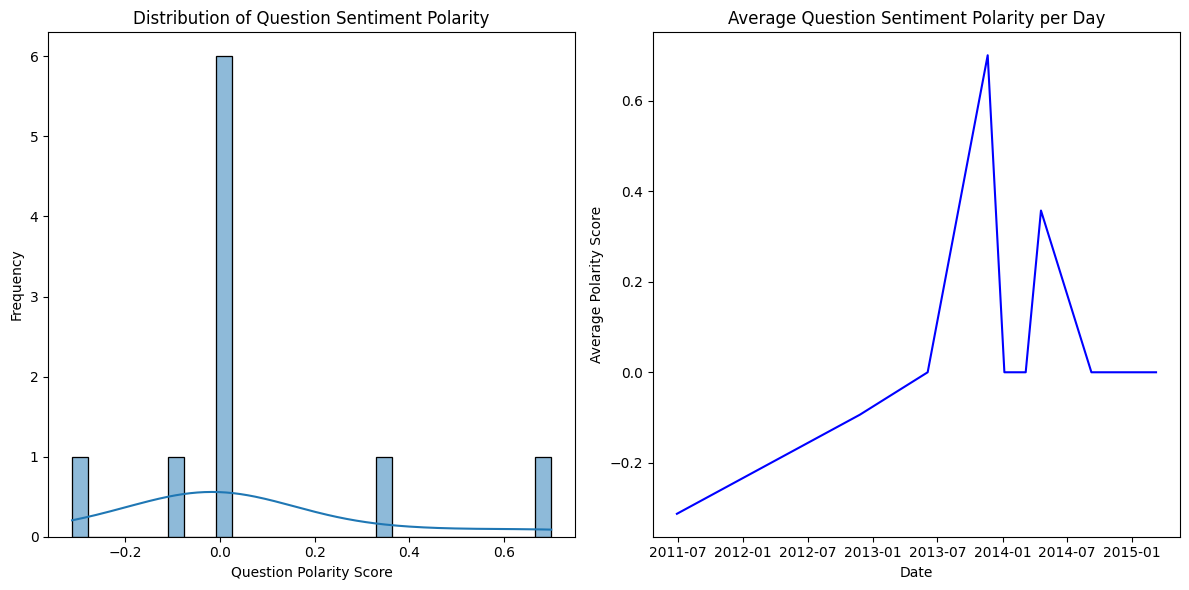

In [6]:
from textblob import TextBlob
#quesiton
# Sentiment Analysis Function
def analyze_sentiment(message):
    return TextBlob(message).sentiment

# Apply sentiment analysis to each message
df_instance['sentiment_question'] = df_instance['question'].apply(lambda x: analyze_sentiment(x))

# Extracting sentiment polarity and subjectivity
df_instance['polarity_question'] = df_instance['sentiment_question'].apply(lambda x: x.polarity)
df_instance['subjectivity_question'] = df_instance['sentiment_question'].apply(lambda x: x.subjectivity)

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))

# Distribution of Polarity Scores
plt.subplot(1, 2, 1)
sns.histplot(df_instance['polarity_question'], kde=True, bins=30)
plt.title('Distribution of Question Sentiment Polarity')
plt.xlabel('Question Polarity Score')
plt.ylabel('Frequency')

# Average Sentiment Polarity per Day
avg_polarity_per_day = df_instance.groupby('date')['polarity_question'].mean()
plt.subplot(1, 2, 2)
avg_polarity_per_day.plot(kind='line', color='blue')
plt.title('Average Question Sentiment Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')

plt.tight_layout()
plt.show()

<ipython-input-7-ee4042651ac8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['sentiment_answer'] = df_instance['answer'].apply(lambda x: analyze_sentiment(x))
<ipython-input-7-ee4042651ac8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['polarity_answer'] = df_instance['sentiment_answer'].apply(lambda x: x.polarity)
<ipython-input-7-ee4042651ac8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

KeyError: 'Column not found: polarity'

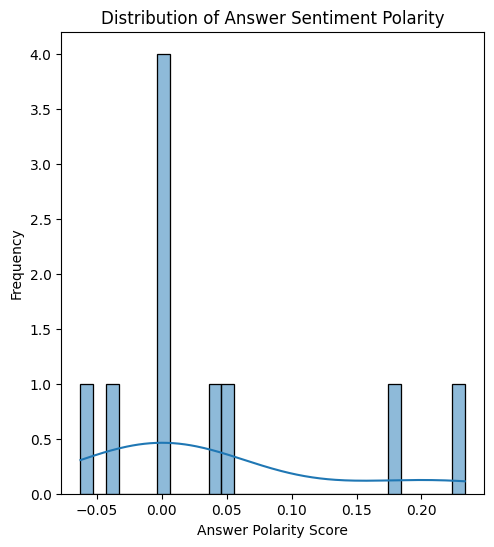

In [7]:
from textblob import TextBlob
#quesiton
# Sentiment Analysis Function
def analyze_sentiment(message):
    return TextBlob(message).sentiment

# Apply sentiment analysis to each message
df_instance['sentiment_answer'] = df_instance['answer'].apply(lambda x: analyze_sentiment(x))

# Extracting sentiment polarity and subjectivity
df_instance['polarity_answer'] = df_instance['sentiment_answer'].apply(lambda x: x.polarity)
df_instance['subjectivity_answer'] = df_instance['sentiment_answer'].apply(lambda x: x.subjectivity)

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))

# Distribution of Polarity Scores
plt.subplot(1, 2, 1)
sns.histplot(df_instance['polarity_answer'], kde=True, bins=30)
plt.title('Distribution of Answer Sentiment Polarity')
plt.xlabel('Answer Polarity Score')
plt.ylabel('Frequency')

# Average Sentiment Polarity per Day
avg_polarity_per_day = df_instance.groupby('date')['polarity'].mean()
plt.subplot(1, 2, 2)
avg_polarity_per_day.plot(kind='line', color='blue')
plt.title('Average Answer Sentiment Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Answer Polarity Score')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to chat messages
df_instance['processed_message_question'] = df_instance['question'].apply(preprocess_text)

# Creating a dictionary and corpus needed for topic modeling
dictionary = corpora.Dictionary(df_instance['processed_message_question'])
corpus = [dictionary.doc2bow(text) for text in df_instance['processed_message_question']]

# Running LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.086*"change" + 0.086*"stone" + 0.086*"lbs" + 0.014*"scale" + 0.014*"carpet"')
(1, '0.048*"scale" + 0.048*"order" + 0.048*"bifocals" + 0.048*"step" + 0.048*"little"')
(2, '0.116*"scale" + 0.063*"weigh" + 0.063*"smart" + 0.063*"believe" + 0.063*"memory"')
(3, '0.081*"lbs" + 0.081*"increments" + 0.081*"graduation" + 0.045*"degeneration" + 0.045*"good"')
(4, '0.082*"scale" + 0.082*"upright" + 0.056*"store" + 0.031*"still" + 0.031*"tub"')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/8j/79nwp_x57b9c7jnp81cswm1r0000gn/T/ipykernel_25023/4071638745.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['processed_message_question'] = df_instance['question'].apply(preprocess_text)


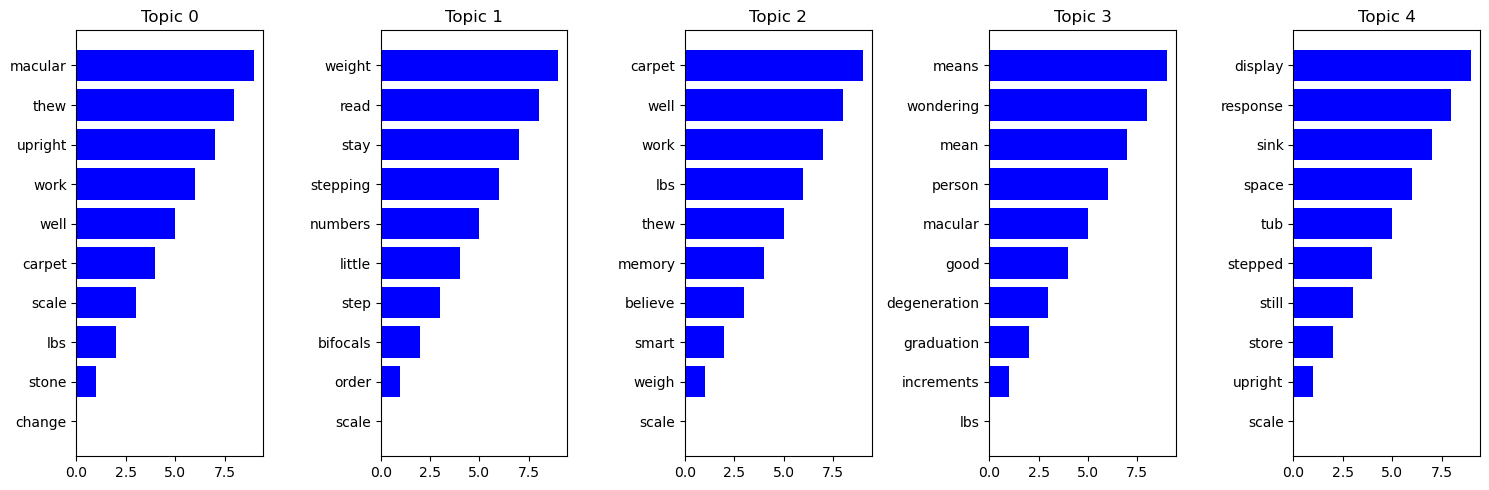

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of words to display per topic
num_words = 10

# Retrieve the words for each topic
topics = {i: [word for word, _ in lda_model.show_topic(i, topn=num_words)] for i in range(lda_model.num_topics)}

# Convert to DataFrame for easier plotting
topics_df = pd.DataFrame(topics)

# Plotting
plt.figure(figsize=(15, 5))
for i in topics_df.columns:
    plt.subplot(1, len(topics_df.columns), i+1)
    plt.barh(topics_df[i], range(len(topics_df[i])), color='blue')
    plt.title(f'Topic {i}')
    plt.yticks(range(len(topics_df[i])), topics_df[i])
plt.tight_layout()
plt.show()

,questionType,asin,answerTime,unixTime,question,answer,answerType,date,time,day_of_week,sentiment,polarity,subjectivity,processed_message,sentiment_question,polarity_question,subjectivity_question,sentiment_answer,polarity_answer,subjectivity_answer
28071,open-ended,B001KXZ808,2011-06-29,1.309331e+09,What does Graduation increments of .2 lbs. / 3oz mean? My scale seems to be incorrect? So I an wondering what Graduation increments of .2 lbs. / 3oz means?,"This is a common issue with digital electronic meters and digital anything. Say you have a clock that is accurate...it keeps perfect time. If your digital clock says it is 6:05 it could actually be anywhere between 6:05:00 and 6:05:59...the clock display has only one minute resolution. Which is fine if you are using it to avoid being late for work, but probably not good enough if you are trying to time a 13 second photographic exposure. For that you need something with better resolution. 0.2 lbs (~3 oz) is the resolution of this scale. The scale can display only .2 lb increments. 10.2 lbs means that if the scale were perfect, the actual weight would be somewhere between 10.10 and 10.30 pounds. (less it would read 10.0, more it would read 10.4) In truth most digital devices are only accurate to plus or minus one resolution step....IF your test weight is really exactly 10.000 lbs, then I would say the scale is working right if read 9.8 or 10.0, or 10.2 lbs. BUT, if you are using a 10...",NaN,2011-06-29,00:00:00,Wednesday,"(0.18250744047619047, 0.44203869047619043)",0.182507,0.442039,"[graduation, increments, lbs, mean, scale, seems, incorrect, wondering, graduation, increments, lbs, means]","(-0.3125, 0.6875)",-0.312500,0.687500,"(0.18250744047619047, 0.44203869047619043)",0.182507,0.442039
28072,open-ended,B001KXZ808,2014-04-19,1.397891e+09,"This scale is 0.4 lbs more than the Smart Weigh DVS250, which should I believe in?","Neither. If you want scientific accuracy you should buy an expensive triple beam balance. The real question is which scale is precise. That is, which gives reproducible values. The EatSmart scale is said to be one of the most precise electronic scales you can buy. If you're looking to track your weight, precision is the important attribute.",NaN,2014-04-19,00:00:00,Saturday,"(0.2333333333333333, 0.6833333333333332)",0.233333,0.683333,"[scale, lbs, smart, weigh, believe]","(0.35714285714285715, 0.5714285714285714)",0.357143,0.571429,"(0.2333333333333333, 0.6833333333333332)",0.233333,0.683333
28073,open-ended,B001KXZ808,2014-01-17,1.389946e+09,how do I change from stone to lbs,"Out of the box, the scale is set to pounds. To switch units, there is a button under the scale that you press to toggle from kilograms, stones, and pounds. On an older model, there is a three position switch instead. If the button doesn't work, then maybe you got water into the space around the button and the insides got damaged or rusted. This happened to me with a scale of a different brand. The EatSmart scale has taller legs so water damage may be less likely to happen.",NaN,2014-01-17,00:00:00,Friday,"(0.0, 0.5)",0.000000,0.500000,"[change, stone, lbs]","(0.0, 0.0)",0.000000,0.000000,"(0.0, 0.5)",0.000000,0.500000
28074,yes/no,B001KXZ808,2013-06-04,1.370329e+09,"can I store it upright, meaning, there is a space between sink and tub where I keep my scale, but it's in an upright position.","You could store it upright. The only thing is that you'd have to recalibrate it every time you use it, because it has to be on a flat, hard surface when you are using it. It's easy to calibrate though--you just hold the top down with your hand for a few seconds until it goes to zero. Hope this helps.",?,2013-06-04,00:00:00,Tuesday,"(0.0373015873015873, 0.48412698412698413)",0.037302,0.484127,"[store, upright, meaning, space, sink, tub, keep, scale, upright, position]","(0.0, 0.0)",0.000000,0.000000,"(0.0373015873015873, 0.48412698412698413)",0.037302,0.484127
28075,yes/no,B001KXZ808,2012-11-25,1.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to chat messages
df_instance['processed_message_answer'] = df_instance['answer'].apply(preprocess_text)

# Creating a dictionary and corpus needed for topic modeling
dictionary = corpora.Dictionary(df_instance['processed_message_answer'])
corpus = [dictionary.doc2bow(text) for text in df_instance['processed_message_answer']]

# Running LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.049*"scale" + 0.025*"button" + 0.018*"buy" + 0.018*"precise" + 0.018*"eatsmart"')
(1, '0.031*"scale" + 0.021*"surface" + 0.021*"zero" + 0.021*"hard" + 0.021*"hope"')
(2, '0.029*"way" + 0.029*"level" + 0.016*"also" + 0.016*"keeps" + 0.016*"problem"')
(3, '0.039*"weight" + 0.034*"would" + 0.030*"lbs" + 0.025*"scale" + 0.025*"resolution"')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiqinzeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/8j/79nwp_x57b9c7jnp81cswm1r0000gn/T/ipykernel_25023/58098249.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['processed_message_answer'] = df_instance['answer'].apply(preprocess_text)


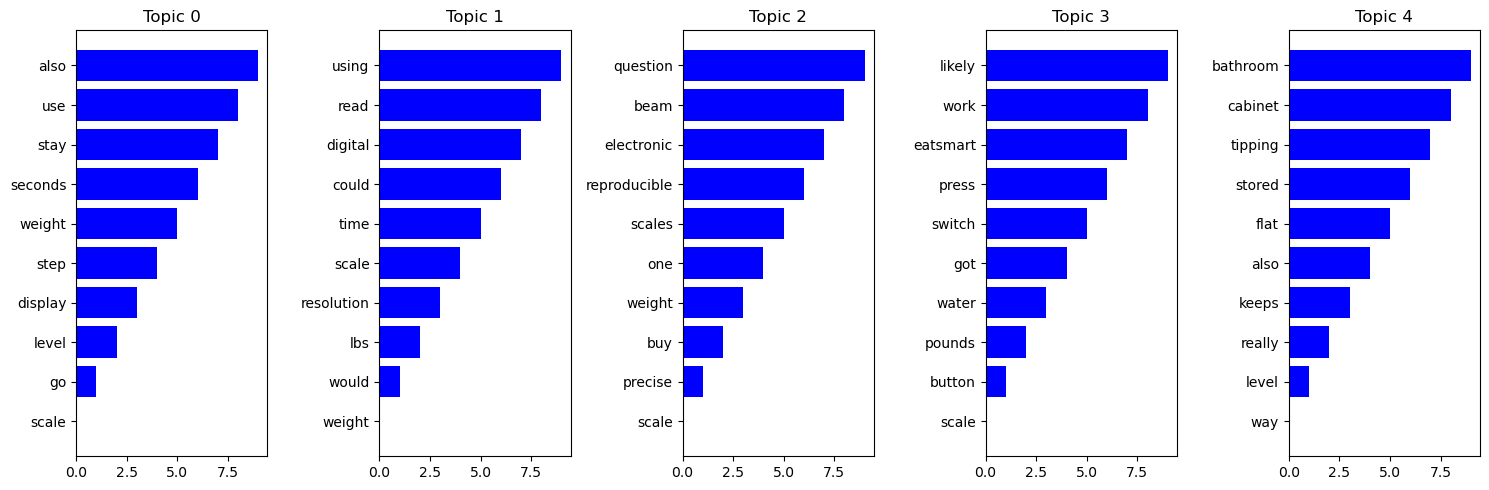

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of words to display per topic
num_words = 10

# Retrieve the words for each topic
topics = {i: [word for word, _ in lda_model.show_topic(i, topn=num_words)] for i in range(lda_model.num_topics)}

# Convert to DataFrame for easier plotting
topics_df = pd.DataFrame(topics)

# Plotting
plt.figure(figsize=(15, 5))
for i in topics_df.columns:
    plt.subplot(1, len(topics_df.columns), i+1)
    plt.barh(topics_df[i], range(len(topics_df[i])), color='blue')
    plt.title(f'Topic {i}')
    plt.yticks(range(len(topics_df[i])), topics_df[i])
plt.tight_layout()
plt.show()

In [ ]:
df_instance['processed_message_answer']

28071    [common, issue, digital, electronic, meters, digital, anything, say, clock, accurate, keeps, perfect, time, digital, clock, says, could, actually, anywhere, clock, display, one, minute, resolution, fine, using, avoid, late, work, probably, good, enough, trying, time, second, photographic, exposure, need, something, better, resolution, lbs, oz, resolution, scale, scale, display, lb, increments, lbs, means, scale, perfect, actual, weight, would, somewhere, pounds, less, would, read, would, read, truth, digital, devices, accurate, plus, minus, one, resolution, step, test, weight, really, exactly, lbs, would, say, scale, working, right, read, lbs, using, exercise, weight, would, count, within, better, lb, really, care, probably, office, weights, measures, locally, checks, ...]
28072                                                                                                                                                                                                          

In [ ]:
df_instance['processed_message_question']

28071    [graduation, increments, lbs, mean, scale, seems, incorrect, wondering, graduation, increments, lbs, means]
28072                                                                            [scale, lbs, smart, weigh, believe]
28073                                                                                           [change, stone, lbs]
28074                                    [store, upright, meaning, space, sink, tub, keep, scale, upright, position]
28075           [weight, stay, lit, little, stepping, scale, wear, bifocals, need, step, back, order, read, numbers]
28076                                                                          [good, person, macular, degeneration]
28077                                                                            [store, scale, upright, one, sides]
28078                                                                                           [work, well, carpet]
28079                                                           